#Predicción de asteroides

Import library COLAB
Importamos las librerías de COLAB

In [ ]:
from google.colab import files
import pandas as pd
import io

In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
dataframe = pd.read_csv(io.StringIO(uploaded['dataset.csv'].decode('utf-8')))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Overview of the data

In [ ]:
dataframe.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
dataframe

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.3

In [ ]:
dataframe.info

<bound method DataFrame.info of               id    spkid          full_name  ...     sigma_per class      rms
0       a0000001  2000001            1 Ceres  ...  9.415900e-09   MBA  0.43301
1       a0000002  2000002           2 Pallas  ...  3.680700e-06   MBA  0.35936
2       a0000003  2000003             3 Juno  ...  3.107200e-06   MBA  0.33848
3       a0000004  2000004            4 Vesta  ...  1.274900e-06   MBA  0.39980
4       a0000005  2000005          5 Astraea  ...  3.490500e-06   MBA  0.52191
...          ...      ...                ...  ...           ...   ...      ...
958519  bPLS6013  3246801         (6013 P-L)  ...  7.264900e+02   MBA  0.23839
958520  bPLS6331  3246834         (6331 P-L)  ...  1.578500e-05   MBA  0.53633
958521  bPLS6344  3013075         (6344 P-L)  ...  9.127500e-05   APO  0.51556
958522  bT2S2060  3246457         (2060 T-2)  ...  5.035500e+02   MBA  0.25641
958523  bT3S2678  3246553         (2678 T-3)  ...  1.064800e+02   MBA  0.26980

[958524 rows x 45 c

In [ ]:
dataframe.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [ ]:
dataframe.isnull().sum() / len(dataframe) * 100

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

##Limpieza de datos##

In [ ]:
df = dataframe.drop(['name', 'prefix'], axis=1)

In [ ]:
df[df['pha'] == 'Y'].isnull().sum()

id                   0
spkid                0
full_name            0
pdes                 0
neo                  0
pha                  0
H                    0
diameter          1845
albedo            1866
diameter_sigma    1877
orbit_id             0
epoch                0
epoch_mjd            0
epoch_cal            0
equinox              0
e                    0
a                    0
q                    0
i                    0
om                   0
w                    0
ma                   0
ad                   0
n                    0
tp                   0
tp_cal               0
per                  0
per_y                0
moid                 0
moid_ld              0
sigma_e              0
sigma_a              0
sigma_q              0
sigma_i              0
sigma_om             0
sigma_w              0
sigma_ma             0
sigma_ad             0
sigma_n              0
sigma_tp             0
sigma_per            0
class                0
rms                  0
dtype: int6

In [ ]:
df = df.dropna()

In [ ]:
df

,id,spkid,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,bK16N07B,3755231,(2016 NB7),2016 NB7,N,N,16.20,3.793,0.0210,1.375,JPL 9,2459000.5,59000,20200531.0,J2000,0.159579,3.169936,2.664080,27.102826,309.042331,19.782056,234.794606,3.675791,0.174634,2.459717e+06,2.022052e+07,2061.456319,5.643960,1.66139,646.563146,3.106900e-07,2.272900e-07,1.121200e-06,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,bK16N24W,3755298,(2016 NW24),2016 NW24,N,N,17.40,2.696,0.0610,0.701,7,2459000.5,59000,20200531.0,J2000,0.074890,2.550597,2.359584,11.583615,246.280735,170.346154,241.854661,2.741610,0.241959,2.459489e+06,2.021100e+07,1487.857000,4.073530,1.37273,534.225334,5.761500e-07,1.370200e-06,2.637600e-06,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,bK16P66B,3757444,(2016 PB66),2016 PB66,N,N,17.20,3.271,0.0720,1.074,8,2459000.5,59000,20200531.0,J2000,0.287894,3.050244,2.172096,14.461482,343.918035,342.641550,249.675621,3.928393,0.185013,2.459597e+06,2.022012e+07,1945.809553,5.327336,1.16559,453.612660,2.215400e-06,1.762400e-06,8.008000e-06,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,bK16TB9F,54000016,(2016 TF119),2016 TF119,N,N,16.00,3.009,0.0780,0.981,JPL 1,2459000.5,59000,20200531.0,J2000,0.240246,3.191395,2.424676,25.525292,328.424134,62.229574,232.967849,3.958114,0.172875,2.459735e+06,2.022060e+07,2082.424614,5.701368,1.52330,5

Import librerys

Importamos las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


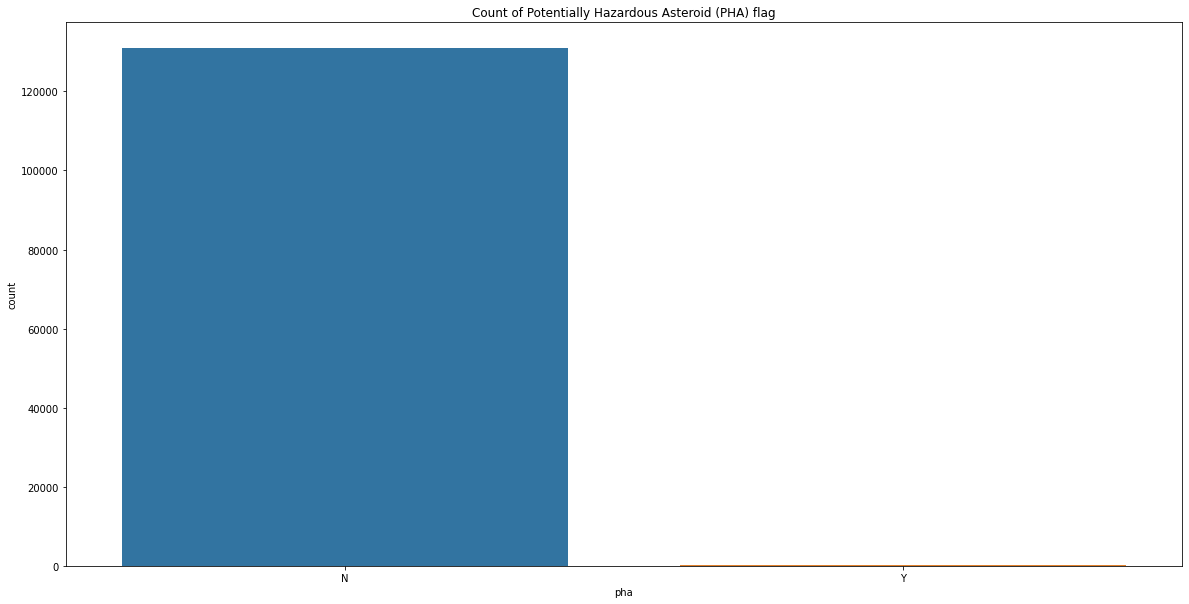

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Potentially Hazardous Asteroid (PHA) flag')
sns.countplot(data=df, x='pha');

In [ ]:
len(df[df['pha'] == 'N'])

130961

In [ ]:
len(df[df['pha'] == 'Y'])

181

In [ ]:
len(df[df['pha'] == 'Y'])/ len(df[df['pha'] == 'N']) * 100


0.13820908514748667

In [ ]:
df['equinox'].unique()

array(['J2000'], dtype=object)

In [ ]:
df = df.drop(['id', 'spkid','full_name', 'equinox','orbit_id','pdes'], axis=1)

In [ ]:
df

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,N,N,16.20,3.793,0.0210,1.375,2459000.5,59000,20200531.0,0.159579,3.169936,2.664080,27.102826,309.042331,19.782056,234.794606,3.675791,0.174634,2.459717e+06,2.022052e+07,2061.456319,5.643960,1.66139,646.563146,3.106900e-07,2.272900e-07,1.121200e-06,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,N,N,17.40,2.696,0.0610,0.701,2459000.5,59000,20200531.0,0.074890,2.550597,2.359584,11.583615,246.280735,170.346154,241.854661,2.741610,0.241959,2.459489e+06,2.021100e+07,1487.857000,4.073530,1.37273,534.225334,5.761500e-07,1.370200e-06,2.637600e-06,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,N,N,17.20,3.271,0.0720,1.074,2459000.5,59000,20200531.0,0.287894,3.050244,2.172096,14.461482,343.918035,342.641550,249.675621,3.928393,0.185013,2.459597e+06,2.022012e+07,1945.809553,5.327336,1.16559,453.612660,2.215400e-06,1.762400e-06,8.008000e-06,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,N,N,16.00,3.009,0.0780,0.981,2459000.5,59000,20200531.0,0.240246,3.191395,2.424676,25.525292,328.424134,62.229574,232.967849,3.958114,0.172875,2.459735e+06,2.022060e+07,2082.424614,5.701368,1.52330,592.822661,2.054800e-06,7.684100e-07,5.987100e-06,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


##Understanding the data - Entendiendo los datos

We will first make a content with descriptive statistics to be able to understand the data that we are going to work with, this in order to have an approach to the data and thus have an intuition of what we are going to do and how to achieve it.

Haremos primero un contenido con Estadística descriptiva para poder comprender los datos que vamos a trabajar, esto con el fin de tener un acercamiento a los datos y así tener una intuición de lo que vamos a hacer y como lograrlo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131142 entries, 0 to 909489
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             131142 non-null  object 
 1   pha             131142 non-null  object 
 2   H               131142 non-null  float64
 3   diameter        131142 non-null  float64
 4   albedo          131142 non-null  float64
 5   diameter_sigma  131142 non-null  float64
 6   epoch           131142 non-null  float64
 7   epoch_mjd       131142 non-null  int64  
 8   epoch_cal       131142 non-null  float64
 9   e               131142 non-null  float64
 10  a               131142 non-null  float64
 11  q               131142 non-null  float64
 12  i               131142 non-null  float64
 13  om              131142 non-null  float64
 14  w               131142 non-null  float64
 15  ma              131142 non-null  float64
 16  ad              131142 non-null  float64
 17  n         

In [ ]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'APO', 'ATE', 'CEN',
       'AST', 'TNO'], dtype=object)

In [ ]:
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})

In [ ]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

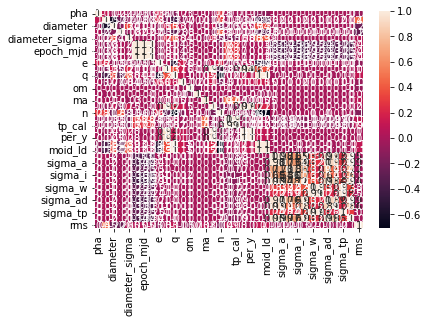

In [ ]:
sns.heatmap(data=round(df.corr(),2), annot=True)

In [ ]:
df= pd.get_dummies(df)

##Data Modelling-Modelaje de datos

In [ ]:
X = df.drop('pha', axis=1)
y = df['pha']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model Imports - Importación de Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(),
          'XGBRFClassifier': XGBRFClassifier()}

In [ ]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
baseline_model_scores.sort_values('Score')

,Score
KNeighborsClassifier,0.998246
SVC,0.998526
LogisticRegression,0.999339
RandomForestClassifier,0.999847
DecisionTreeClassifier,0.999949
GradientBoostingClassifier,0.999949
AdaBoostClassifier,1.000000
XGBClassifier,1.000000
XGBRFClassifier,1.000000


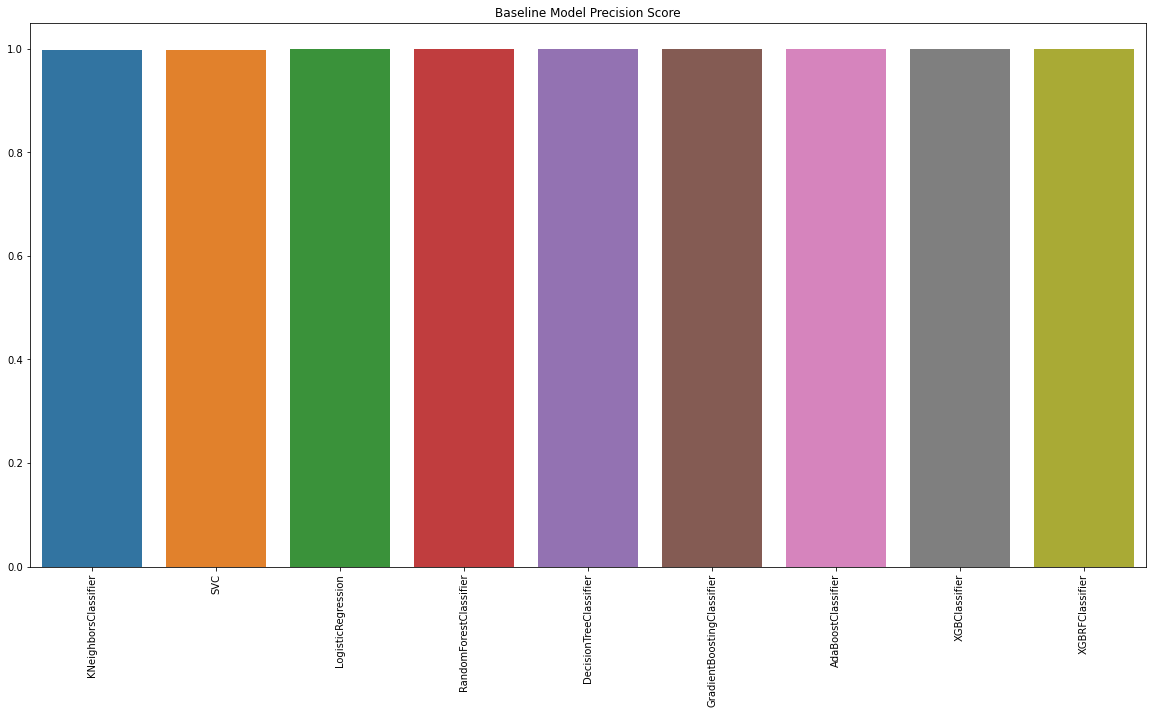

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

##Model Evaluating - Evaluación del modelo 

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve 


In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       1.00      1.00      1.00        58

    accuracy                           1.00     39343
   macro avg       1.00      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


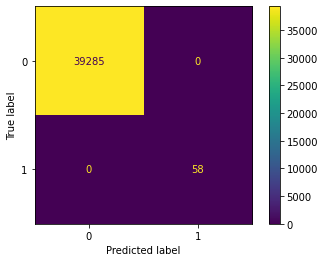

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


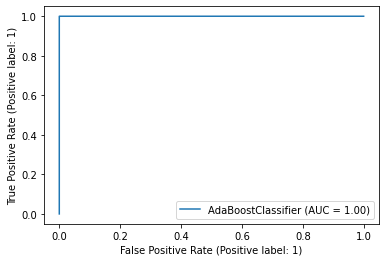

In [ ]:
plot_roc_curve(model, X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_acc = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
cv_acc

array([1.        , 1.        , 1.        , 0.99984749, 0.99763611])

In [ ]:
cv_acc = cv_acc.mean()

In [ ]:
cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
cv_precision

array([1.        , 1.        , 1.        , 1.        , 0.36734694])

In [ ]:
cv_precision.mean()

0.8734693877551021

In [ ]:
cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
cv_recall

array([1.        , 1.        , 1.        , 0.88888889, 1.        ])

In [ ]:
cv_recall.mean()

0.9777777777777779

In [ ]:
cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
cv_f1

array([1.        , 1.        , 1.        , 0.94117647, 0.53731343])

In [ ]:
cv_f1.mean()

0.8956979806848112

Text(0.5, 1.0, 'CV scores')

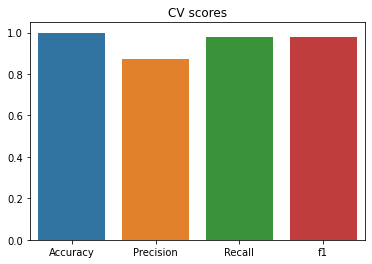

In [ ]:
cv_merics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
sns.barplot(data=cv_merics)
plt.title('CV scores')

In [ ]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.999497,0.873469,0.977778,0.977778


In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)


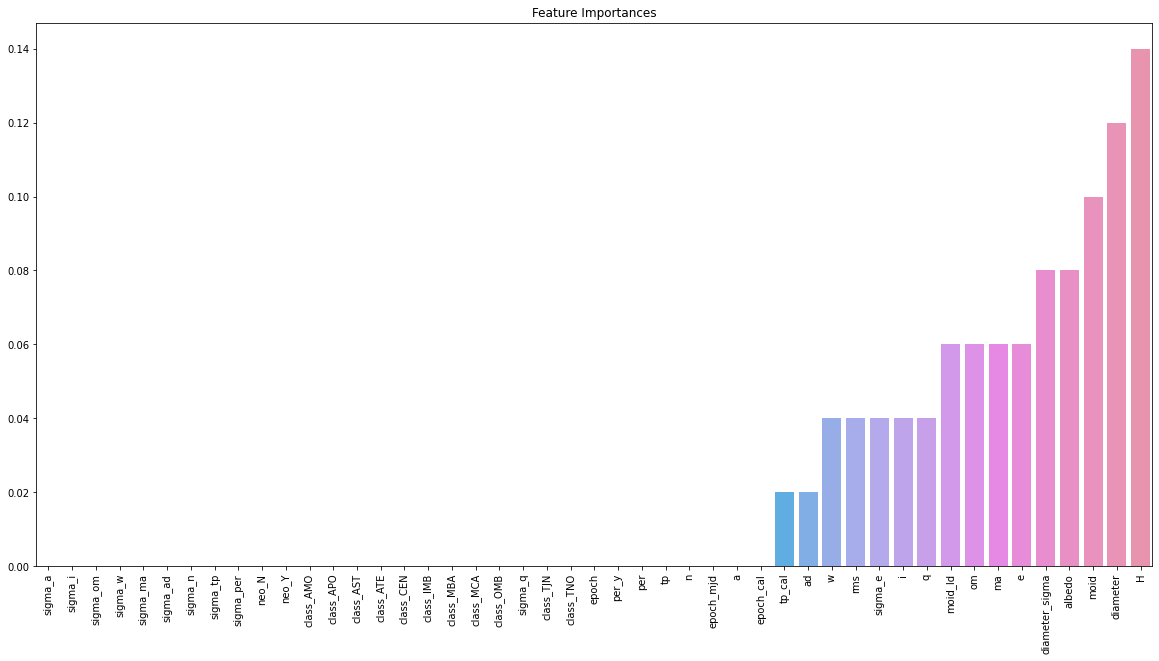

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve 

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       1.00      1.00      1.00        58

    accuracy                           1.00     39343
   macro avg       1.00      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


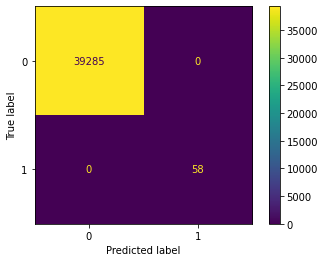

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


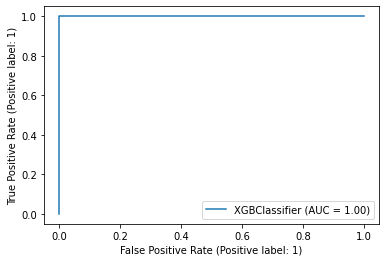

In [ ]:
plot_roc_curve(model, X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_acc = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
cv_acc

array([1.        , 1.        , 1.        , 0.99988562, 0.99763611])

In [ ]:
cv_acc = cv_acc.mean()

In [ ]:
cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
cv_precision

array([1.        , 1.        , 1.        , 1.        , 0.36734694])

In [ ]:
cv_precision.mean()

0.8734693877551021

In [ ]:
cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
cv_recall

array([1.        , 1.        , 1.        , 0.91666667, 1.        ])

In [ ]:
cv_recall.mean()

0.9833333333333332

In [ ]:
cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
cv_f1

array([1.        , 1.        , 1.        , 0.95652174, 0.53731343])

In [ ]:
cv_f1.mean()

0.898767034393251

Text(0.5, 1.0, 'CV scores')

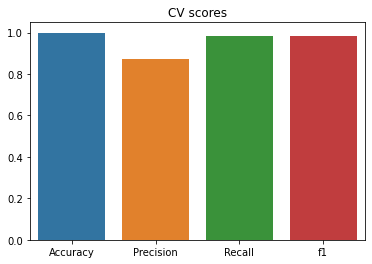

In [ ]:
cv_merics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
sns.barplot(data=cv_merics)
plt.title('CV scores')


###Features importances - características importantes

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)

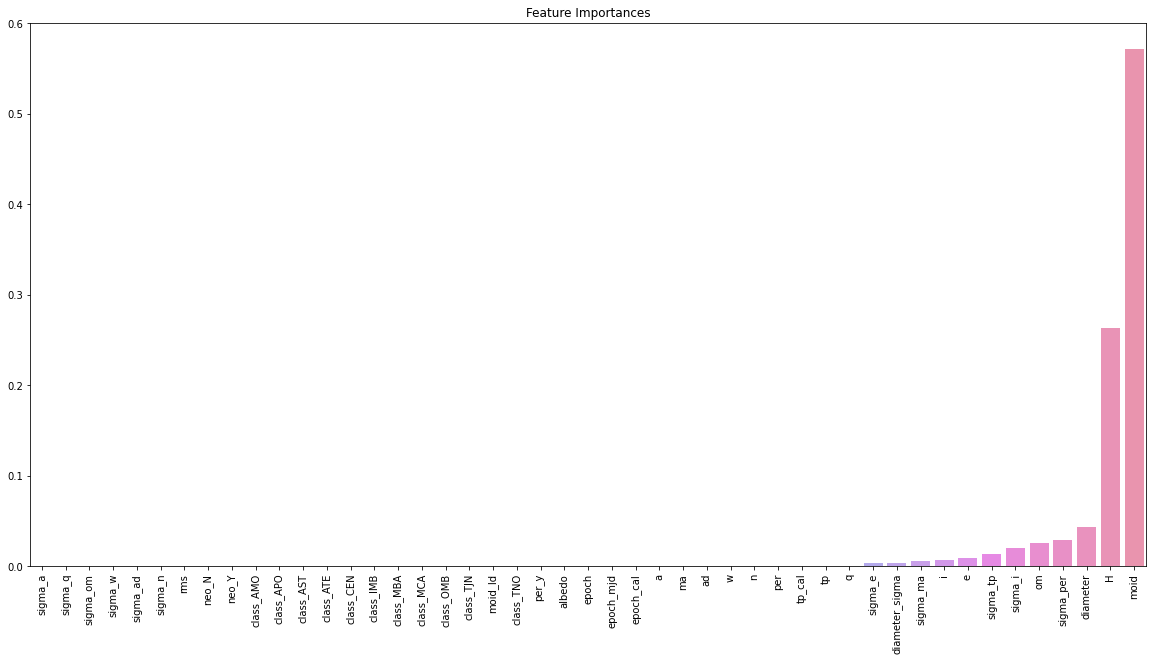

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

## Experimentación
As we can see that both model are performing rather well with just the baseline modeling with out any hyperparameter tuning yet.

We can try hypertune the model for a slighly better results.

We can see from the feature importance from both models, diameter, albedo and diameter_sigma used in the models. however in the XGBoost the feature importance for it is lower. Could we instead drop that coloum for us to feed in more data instead?

1.Como podemos ver, ambos modelos están funcionando bastante bien con solo el modelo de referencia sin ningún ajuste de hiperparámetro todavía.

2.Podemos intentar hiperafinar el modelo para obtener resultados ligeramente mejores.

3.Podemos ver por la importancia de las características de ambos modelos, diámetro, albedo y diámetro_sigma utilizados en los modelos. sin embargo, en XGBoost, la importancia de la característica es menor. ¿Podríamos, en cambio, soltar ese coloum para que ingresemos más datos?